<a href="https://colab.research.google.com/github/datascience-uniandes/classification-tutorial/blob/master/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimate if a brain tumor is malignant or benign

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Last update: October, 2022

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
# Reading CSV
cancer_df = pd.read_csv('./data/cancer.csv', sep = ',')

In [3]:
# Deleting unused column
del cancer_df['Unnamed: 32']

In [4]:
cancer_df.shape

(569, 32)

In [5]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting train and test datasets

In [7]:
# Selecting features to train the model
features = cancer_df.columns.tolist()[2:]

In [8]:
# Creating feature matrix
X = cancer_df[features]

In [9]:
# Creating target
Y = cancer_df['diagnosis'].replace({'B': 0, 'M': 1})

In [10]:
Y.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [11]:
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 500)

In [12]:
Y_train.value_counts(normalize = True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [13]:
Y_test.value_counts(normalize = True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

### Training the model

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
# Initializing the model
model = LogisticRegression(penalty = 'l1', C = 0.01, solver = 'liblinear', class_weight = 'balanced', random_state = 80)

In [17]:
# Training the model using training dataset
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=80, solver='liblinear')

In [18]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis = 1), columns = ['feature', 'coefficient'])

,feature,coefficient
0,radius_mean,0.0
1,texture_mean,0.0
2,perimeter_mean,0.0
3,area_mean,0.0
4,smoothness_mean,0.0
5,compactness_mean,0.0
6,concavity_mean,0.0
7,concave points_mean,0.0
8,symmetry_mean,0.0
9,fractal_dimension_mean,0.0


### TODO:

How to interpret coefficients in Logistic Regression?

### Evaluating the model

In [19]:
# Predicting for test dataset
predictions = model.predict(scaler.transform(X_test))

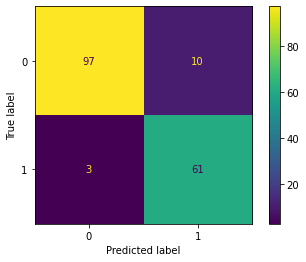

In [20]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

In [21]:
# Calculating confusion matrix derived metrics
print('Precision:', precision_score(Y_test, predictions))
print('Recall:', recall_score(Y_test, predictions))
print('F1:', f1_score(Y_test, predictions))

Precision: 0.8591549295774648
Recall: 0.953125
F1: 0.9037037037037037


### Analyzing probabilities

In [22]:
probabilities = model.predict_proba(scaler.transform(X_test))[:,1]

In [23]:
probs_true_df = pd.DataFrame(np.append(probabilities.reshape(-1, 1), Y_test.values.reshape(-1, 1), axis = 1), columns = ['probs', 'true'])

In [24]:
probs_true_df.head()

,probs,true
0,0.439506,0.0
1,0.355191,0.0
2,0.435535,0.0
3,0.540869,1.0
4,0.405148,0.0


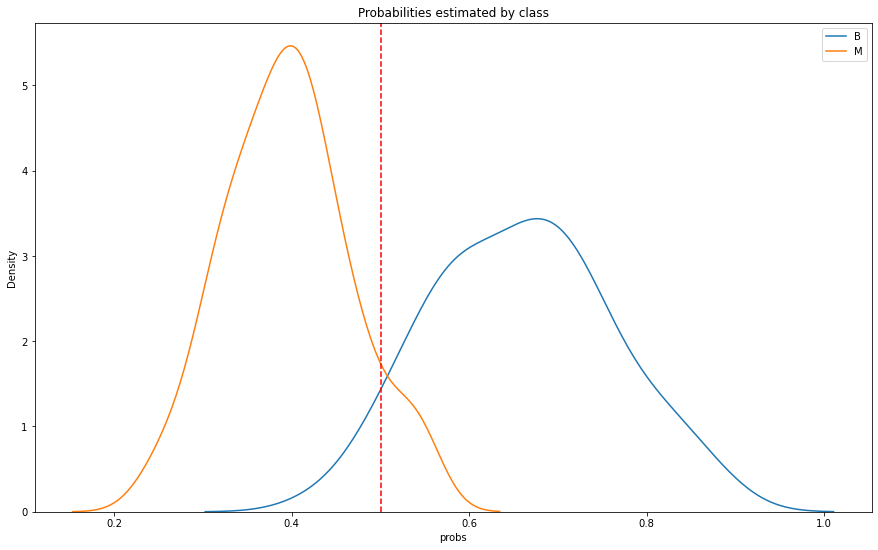

In [25]:
plt.figure(figsize = (15, 9))
sns.kdeplot(data = probs_true_df.loc[probs_true_df['true'] == 1], x = 'probs', label = 'B')
sns.kdeplot(data = probs_true_df.loc[probs_true_df['true'] == 0], x = 'probs', label = 'M')
plt.axvline(x = .5, color = 'r', linestyle = '--')
plt.title('Probabilities estimated by class')
plt.legend()
plt.show()